### 1(b) Given dataset has been uploaded

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('/content/breastcancer.csv')

df = df.drop(columns=['Unnamed: 32'], errors='ignore')

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print(df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

### 1(a) Added more density layers to the existing code and checked the accurracy level

In [10]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_task1 = Sequential()
model_task1.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_task1.add(Dense(64, activation='relu'))
model_task1.add(Dense(128, activation='relu'))
model_task1.add(Dense(1, activation='sigmoid'))

model_task1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_task1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy_task1 = model_task1.evaluate(X_test, y_test)[1]
print(f"Task 1 - Model Accuracy: {accuracy_task1}")

Epoch 1/10
15/15 [==============================] - 1s 17ms/step - loss: 4.0996 - accuracy: 0.6440 - val_loss: 2.7071 - val_accuracy: 0.3860
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 1.5084 - accuracy: 0.6659 - val_loss: 0.6956 - val_accuracy: 0.8772
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.7544 - accuracy: 0.8396 - val_loss: 0.7175 - val_accuracy: 0.7456
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.5125 - accuracy: 0.8725 - val_loss: 0.2191 - val_accuracy: 0.9123
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8835 - val_loss: 0.2806 - val_accuracy: 0.9035
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.7912 - val_loss: 1.9739 - val_accuracy: 0.7193
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.9945 - accuracy: 0.8044 - val_loss: 0.2126 - val_accuracy: 0.9386
Epoch 8/10
15/15 [=

### 1(c)

In [11]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model_task3 = Sequential()
model_task3.add(Dense(32, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model_task3.add(Dense(64, activation='relu'))
model_task3.add(Dense(1, activation='sigmoid'))

model_task3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_task3.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_data=(X_test_normalized, y_test))

accuracy_task3 = model_task3.evaluate(X_test_normalized, y_test)[1]
print(f"Task 3 - Model Accuracy with Normalization: {accuracy_task3}")

Epoch 1/10
15/15 [==============================] - 1s 17ms/step - loss: 0.6160 - accuracy: 0.6352 - val_loss: 0.4231 - val_accuracy: 0.9211
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.3641 - accuracy: 0.9165 - val_loss: 0.2532 - val_accuracy: 0.9474
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9385 - val_loss: 0.1656 - val_accuracy: 0.9649
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1723 - accuracy: 0.9495 - val_loss: 0.1240 - val_accuracy: 0.9649
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1372 - accuracy: 0.9582 - val_loss: 0.1024 - val_accuracy: 0.9649
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.9692 - val_loss: 0.0892 - val_accuracy: 0.9737
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9824 - val_loss: 0.0817 - val_accuracy: 0.9649
Epoch 8/10
15/15 [=

### 2(a) Plot the loss and accuracy for both training data and validation data using the history object in the source code

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1489 - accuracy: 0.9537 - val_loss: 0.0424 - val_accuracy: 0.9862
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0315 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0283 -

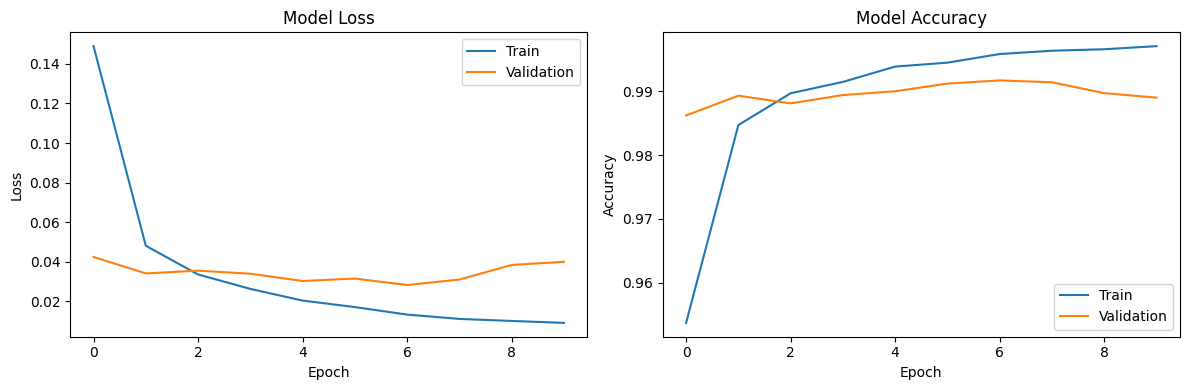

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


### 2(b) Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

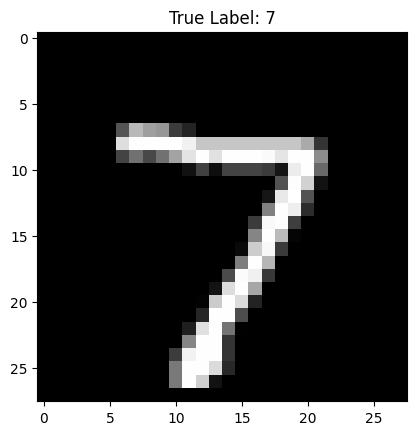

1/1 [==============================] - 0s 439ms/step
Model Prediction: 7


In [17]:
import numpy as np

index_to_plot = 0
plt.imshow(np.squeeze(test_images[index_to_plot]), cmap='gray')
plt.title(f"True Label: {test_labels[index_to_plot]}")
plt.show()

image_to_predict = test_images[index_to_plot][np.newaxis, ...]
predicted_probabilities = model.predict(image_to_predict)
predicted_label = np.argmax(predicted_probabilities)

print(f"Model Prediction: {predicted_label}")


### 2(c) We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1254 - accuracy: 0.9619 - val_loss: 0.0449 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0410 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0285 - accuracy: 0.9914 - val_loss: 0.0436 - val_accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0232 - accuracy: 0.9928 - val_loss: 0.0363 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0182 - accuracy: 0.9945 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0437 -

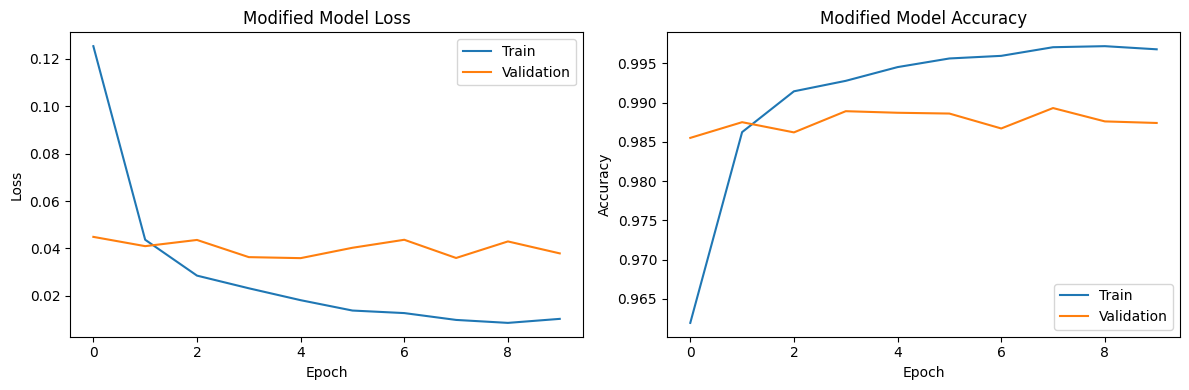

In [18]:
modified_model = models.Sequential()
modified_model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
modified_model.add(layers.MaxPooling2D((2, 2)))
modified_model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
modified_model.add(layers.MaxPooling2D((2, 2)))
modified_model.add(layers.Flatten())
modified_model.add(layers.Dense(128, activation='tanh'))
modified_model.add(layers.Dense(10, activation='softmax'))

modified_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

modified_history = modified_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(modified_history.history['loss'])
plt.plot(modified_history.history['val_loss'])
plt.title('Modified Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(modified_history.history['accuracy'])
plt.plot(modified_history.history['val_accuracy'])
plt.title('Modified Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


### 2(d) Run the same code without scaling the images and check the performance.

Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2724 - accuracy: 0.9415 - val_loss: 0.0649 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0650 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0667 - val_accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0420 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0476 - val_accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0569 - val_accuracy: 0.9839
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0425 -

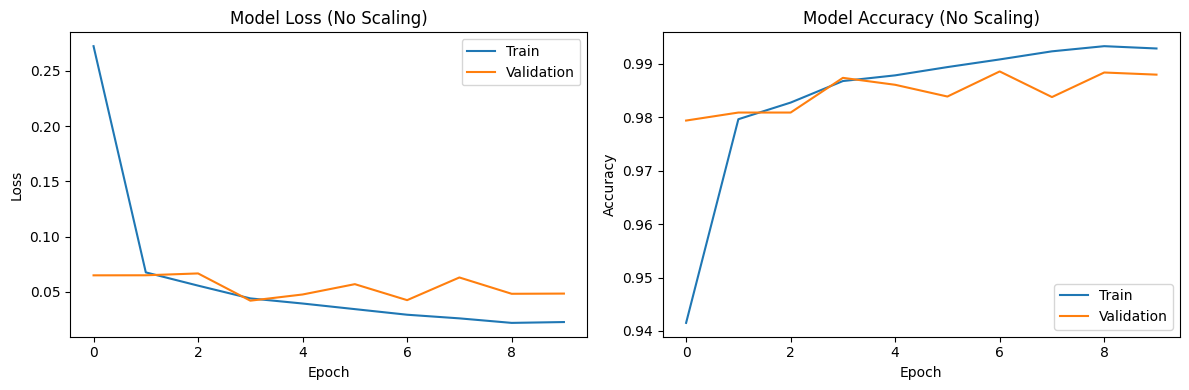

In [19]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

model_no_scaling = models.Sequential()
model_no_scaling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_scaling.add(layers.MaxPooling2D((2, 2)))
model_no_scaling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_scaling.add(layers.MaxPooling2D((2, 2)))
model_no_scaling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_scaling.add(layers.Flatten())
model_no_scaling.add(layers.Dense(64, activation='relu'))
model_no_scaling.add(layers.Dense(10, activation='softmax'))

model_no_scaling.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

history_no_scaling = model_no_scaling.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_no_scaling.history['loss'])
plt.plot(history_no_scaling.history['val_loss'])
plt.title('Model Loss (No Scaling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_no_scaling.history['accuracy'])
plt.plot(history_no_scaling.history['val_accuracy'])
plt.title('Model Accuracy (No Scaling)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()
